### Case 1 - Validation

- Do we compare once more the results of calibration for the dataset 2016 - 2018 with the calibrated parameters?

In [12]:
import os
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import h5py

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
directory_name = 'Case1_B_cv_vaild.demo'
directory_name

'Case1_B_cv_vaild.demo'

In [17]:
### Input data - check : Air temperature - Top.B.C

input_filepath = '/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_InputData_4yrs/Validation_data_2019.h5'

### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_filepath}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(len(np.array(hdf.get('air temperature [K]'))))
    air_temp = np.array(hdf.get('air temperature [K]'))
    #print(air_temp)
    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]_sd0.01', 'precipitation snow [m SWE s^-1]_sd0.04', 'precipitation snow [m SWE s^-1]_sd0.1', 'precipitation snow [m SWE s^-1]_sd0.2', 'precipitation snow [m SWE s^-1]_sd0.45', 'time [s]']


365


In [21]:
time_index = pd.date_range(start='1/1/2019',end='31/12/2019')
input_data = pd.DataFrame(index=time_index,data=air_temp,columns=['air temperature [K]'])
input_data.head()

,air temperature [K]
2019-01-01,259.223333
2019-01-02,260.012972
2019-01-03,257.978333
2019-01-04,255.564653
2019-01-05,256.002431


Text(0.5, 0, 'Daily Time step')

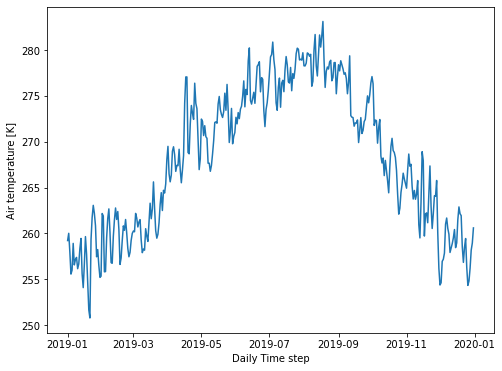

In [31]:
plt.figure(figsize=(8,6))
plt.plot(input_data)

plt.ylabel('Air temperature [K]')
plt.xlabel('Daily Time step')

### Measured data

In [32]:
#### Extracting the measured data
Yakou_measured_data_2019 = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Validate_outputdata_2019.csv', sep='\t',index_col='TIMESTAMP')
Yakou_measured_data_2019.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,
2019-01-01,6.423472,7.538778,8.086528,8.609306,5.178132,3.371944,4.453563,-16.513194,-16.174306,-14.436319,-13.870417,-12.438125,-10.238264,-7.024076,-5.411375
2019-01-02,6.463458,7.577208,8.120833,8.615139,5.161292,3.348535,4.425410,-15.900486,-15.641042,-13.958611,-13.513819,-12.308611,-10.330208,-7.259861,-5.616632
2019-01-03,6.458368,7.578368,8.129028,8.620347,5.153854,3.329340,4.399389,-16.385139,-15.791528,-14.019931,-13.464583,-12.218889,-10.348611,-7.443604,-5.803431
2019-01-04,6.441076,7.562042,8.118333,8.615000,5.151160,3.313813,4.376812,-16.919028,-16.036181,-14.217222,-13.575208,-12.252083,-10.388333,-7.572201,-5.965312
2019-01-05,6.434840,7.551556,8.103681,8.597500,5.139132,3.301118,4.357840,-17.339306,-16.176042,-14.359722,-13.716250,-12.376875,-10.484514,-7.692111,-6.111090


In [34]:
# Calculating the temperature in Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

times = np.arange(1, time_values+1, 1)

# Adding column information:


x = 0
for i, depth in enumerate(depths):
        Yakou_measured_data_2019[f'Soil temperature at - {depth} m (K)'] = Yakou_measured_data_2019[f'Soil temperature at - {depth} m (°C)'] + 273.15

Yakou_measured_data_2019['Soil temperature at - 0.04 m (K)'].head()

TIMESTAMP
2019-01-01    256.975694
2019-01-02    257.508958
2019-01-03    257.358472
2019-01-04    257.113819
2019-01-05    256.973958
Name: Soil temperature at - 0.04 m (K), dtype: float64

In [35]:
Yakou_measured_data_2019.index = pd.to_datetime(Yakou_measured_data_2019.index)

In [36]:
Yakou_mesdata_concise = Yakou_measured_data_2019[['Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.04 m (K)',
       'Soil temperature at - 0.1 m (K)', 'Soil temperature at - 0.2 m (K)',
       'Soil temperature at - 0.4 m (K)', 'Soil temperature at - 0.8 m (K)',
       'Soil temperature at - 1.2 m (K)', 'Soil temperature at - 1.6 m (K)']]

### Simulated data

In [58]:
# /home/rk/pestpp/pestpp/rk_model_final_4yrs/Case1_B_cv_vaild.demo/test_ats_1yr.demo
# Test with the old parameters
sim_data_1yr = pd.read_csv(f'{directory_name}/test_ats_1yr.demo/observations.dat',skiprows=88,sep=' ')
# Test with calibrated parameters
sim_data_calib = pd.read_csv(f'{directory_name}/calib_params.demo/observations.dat',skiprows=88,sep=' ')
sim_data_calib.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.225253,0.225253,0.225253,0.205417,0.205417,0.205417,0.205417
1,86400.0,259.748709,263.977662,266.999959,268.613031,269.909929,270.123302,270.146003,0.225213,0.225219,0.225227,0.205411,0.205416,0.205417,0.205417
2,172800.0,258.714274,262.279506,265.283702,267.203067,269.362398,269.984207,270.107486,0.225212,0.225216,0.225222,0.205408,0.205413,0.205416,0.205417
3,259200.0,257.984119,261.246802,264.142269,266.135111,268.777668,269.768947,270.029477,0.225212,0.225215,0.225219,0.205406,0.205411,0.205415,0.205416
4,345600.0,257.440665,260.512258,263.304630,265.302555,268.218413,269.505289,269.913848,0.225212,0.225214,0.225218,0.205406,0.205410,0.205414,0.205416


In [59]:
### Conversion from saturation of liquid to soil moisture

def saturation_vwc(sim_data, depth_peat, poro_peat, poro_mineral):
    """
    A function written to convert saturation of liquid (s_l) to VWC using the formula - VWC = s_l * porosity * 100
    
    The depth of peat is also considered here = 0.3 m. The values below 0.3 m, 
    porosity of peat is taken and for values above 0.3 m, porosity of mineral is considered.
    
    """
    

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    
    for i, depth in enumerate(depths):
        if depth < depth_peat:
            sim_data[f'Soil moisture at - {depth} m (%)'] = sim_data[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            sim_data[f'Soil moisture at - {depth} m (%)'] = sim_data[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    
    return sim_data

In [60]:
sim_data_1yr = saturation_vwc(sim_data_1yr, depth_peat=0.3, poro_peat=0.695971, poro_mineral=0.459517)
sim_data_calib = saturation_vwc(sim_data_calib, depth_peat=0.3, poro_peat=0.695971, poro_mineral=0.459517)

sim_data_calib.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.225253,0.225253,...,0.205417,0.205417,0.205417,15.676968,15.676968,15.676968,9.439260,9.439260,9.439260,9.439260
1,86400.0,259.748709,263.977662,266.999959,268.613031,269.909929,270.123302,270.146003,0.225213,0.225219,...,0.205416,0.205417,0.205417,15.674190,15.674567,15.675148,9.438971,9.439196,9.439252,9.439259
2,172800.0,258.714274,262.279506,265.283702,267.203067,269.362398,269.984207,270.107486,0.225212,0.225216,...,0.205413,0.205416,0.205417,15.674131,15.674381,15.674764,9.438838,9.439081,9.439215,9.439248
3,259200.0,257.984119,261.246802,264.142269,266.135111,268.777668,269.768947,270.029477,0.225212,0.225215,...,0.205411,0.205415,0.205416,15.674094,15.674293,15.674589,9.438773,9.438991,9.439162,9.439227
4,345600.0,257.440665,260.512258,263.304630,265.302555,268.218413,269.505289,269.913848,0.225212,0.225214,...,0.205410,0.205414,0.205416,15.674069,15.674240,15.674486,9.438735,9.438925,9.439107,9.439197


In [61]:
sim_data_1yr = sim_data_1yr[1:] # Considering from Day 1
sim_data_calib = sim_data_calib[1:] # Considering from Day 1


In [66]:
sim_data_1yr.index = Yakou_mesdata_concise.index # Replacing the index with date
sim_data_calib.index = Yakou_mesdata_concise.index # Replacing the index with date

Text(0.5, 0, 'Days')

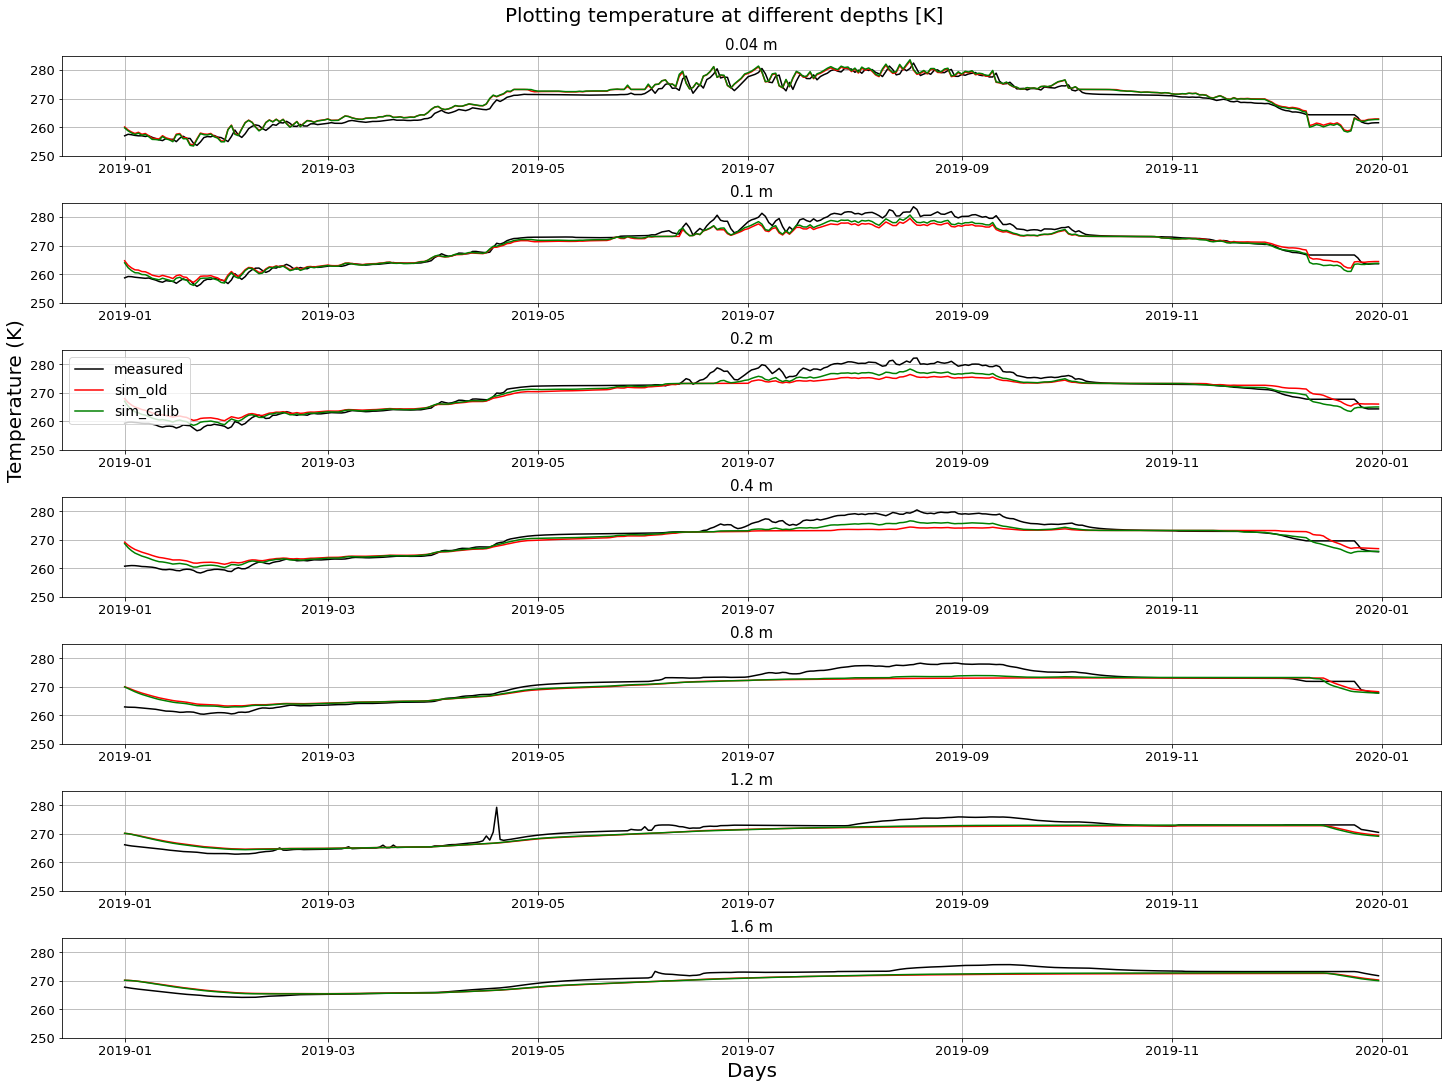

In [67]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

#time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil temperature at - {depth} m (K)'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(sim_data_1yr[f'point -{depth} temperature [K]'], 'r', label='sim_old')
    locals()['f2_ax'+str(j+1)].plot(sim_data_calib[f'point -{depth} temperature [K]'], 'g', label='sim_calib')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax7.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

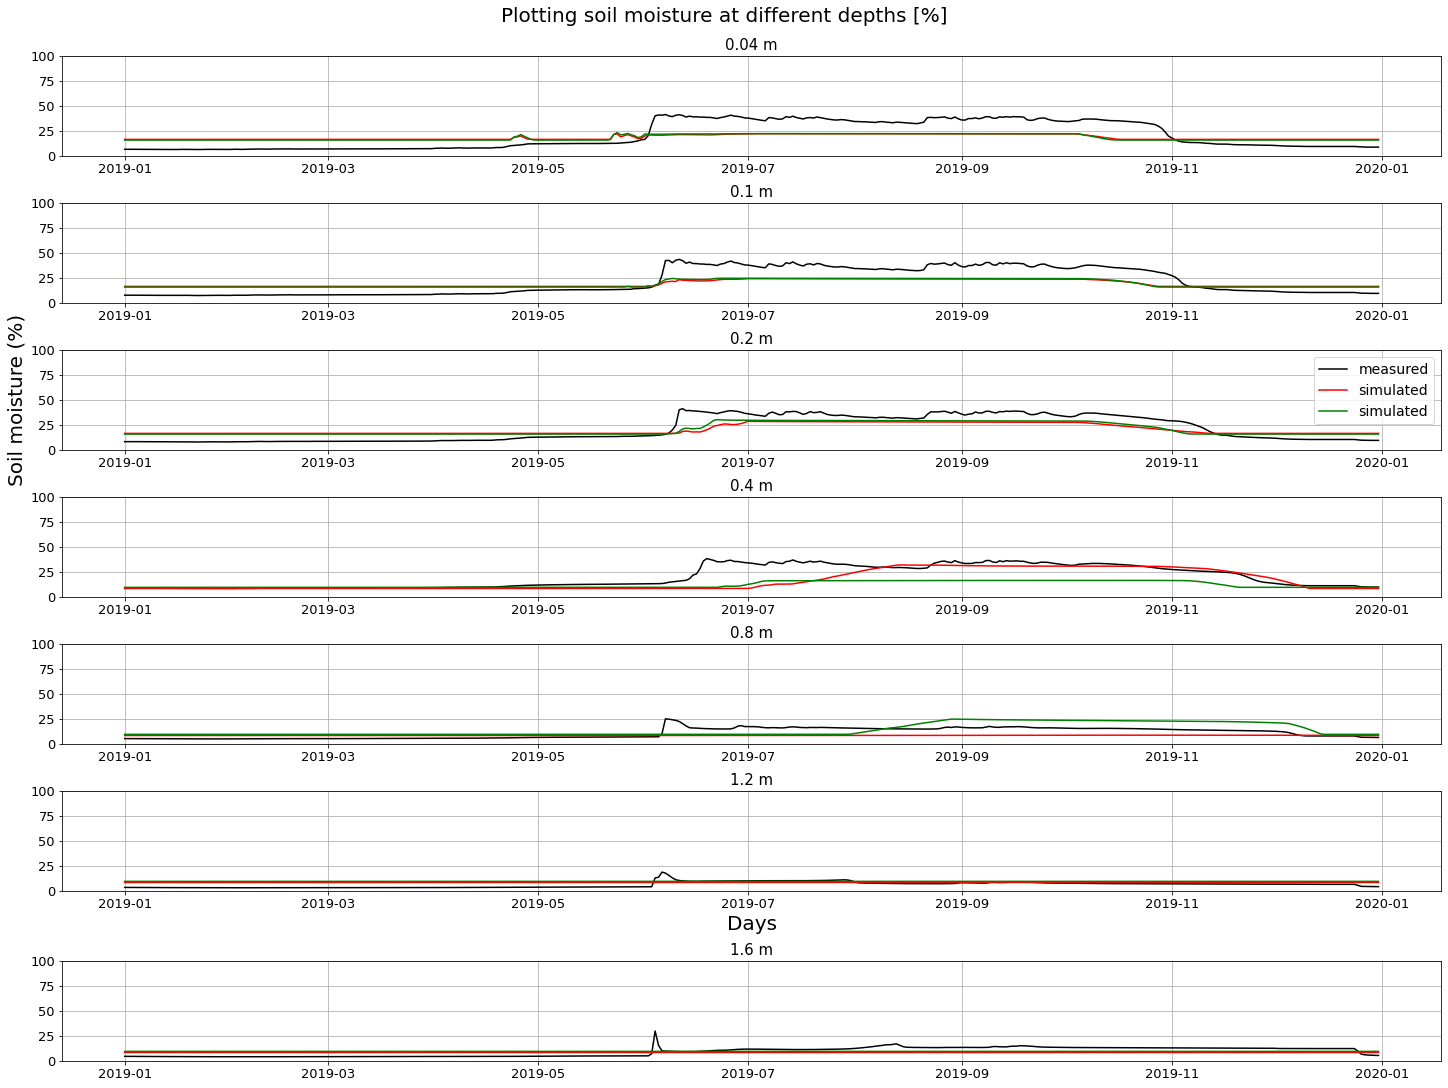

In [68]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [%]', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)


for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(sim_data_1yr[f'Soil moisture at - {depth} m (%)'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].plot(sim_data_calib[f'Soil moisture at - {depth} m (%)'], 'g', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Soil moisture (%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Calculating the RMSE value and NSE (Nash Sutcliff Coefficient)

#### RMSE

In [82]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

rmse_df_case1 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
#rmse_df_case2 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
#rmse_df_case3 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])

In [99]:
# Check
depth = 0.4
np.mean(np.power(sim_data_calib[f'Soil moisture at - {depth} m (%)'] - Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'],2))

130.69343123132384

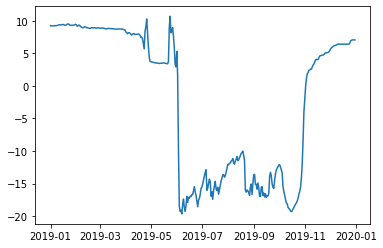

In [100]:
depth = 0.04
plt.plot(sim_data_calib[f'Soil moisture at - {depth} m (%)'] - Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'])

Comments:
* You can observe that the difference is maximum during the summer/precipitation time period 

In [87]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

x = 0

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    rmse_df_case1.iloc[j,0] = np.mean(np.power(sim_data_calib[f'point -{depth} temperature [K]'] - Yakou_mesdata_concise[f'Soil temperature at - {depth} m (K)'],2))
    
    rmse_df_case1.iloc[j,1] = np.mean(np.power(sim_data_calib[f'Soil moisture at - {depth} m (%)'] - Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'],2))

In [88]:
rmse_df_case1

,Temperature,Moisture
0.04,3.113792,130.343569
0.10,3.003449,94.98001
0.20,3.853845,49.354498
0.40,3.723661,130.693431
0.80,5.029776,36.887214
1.20,2.883965,18.904837
1.60,2.606732,18.968258


### NSF
Source: https://en.wikipedia.org/wiki/Nash%E2%80%93Sutcliffe_model_efficiency_coefficient

The Nash–Sutcliffe model efficiency coefficient (NSE) is used to assess the predictive skill of hydrological models. It is defined as:

$NSE = 1 - \frac{\sum_{t=1}^{T} ((Q_o)^t - (Q_m)^t)^2}{\sum_{t=1}^{T} ((Q_o)^t - (\bar{Q_o}))^2}$ 

where $\bar{Q_o}$ is the mean observed discharges, $Q_m$ is the modeled discharge, $(Q_o)^t$ is the observed discharge at time t.

The Nash–Sutcliffe efficiency is calculated as one minus the ratio of the error variance of the modeled time-series divided by the variance of the observed time-series. In the situation of a perfect model with an estimation error variance equal to zero, the resulting Nash–Sutcliffe Efficiency equals 1 (NSE = 1). Conversely, a model that produces an estimation error variance equal to the variance of the observed time series results in a Nash–Sutcliffe Efficiency of 0.0 (NSE = 0). In reality, NSE = 0 indicates that the model has the same predictive skill as the mean of the time-series in terms of the sum of the squared error. In the case of a modeled time series with an estimation error variance that is significantly larger than the variance of the observations, the NSE becomes negative. An efficiency less than zero (NSE < 0) occurs when the observed mean is a better predictor than the model. Values of the NSE nearer to 1, suggest a model with more predictive skill. Subjective application of different NSE values as thresholds of sufficiency have been suggested by several authors.[2][3][4][5] For the application of NSE in regression procedures (i.e. when the total sum of squares can be partitioned into error and regression components), the Nash–Sutcliffe efficiency is equivalent to the coefficient of determination (R2), thus ranging between 0 and 1.

In [101]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

nse_df_case1 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
#nse_df_case2 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
#nse_df_case3 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])

In [102]:
# Defining a Nash-Sutcliffe coefficient
def nse(targets, predictions):
    nse_value = (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
    return nse_value

In [105]:
# Test
nse(Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'],sim_data_calib[f'Soil moisture at - {depth} m (%)'])

0.30629434818455614

In [108]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

x = 0

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    nse_df_case1.iloc[j,0] = nse(Yakou_mesdata_concise[f'Soil temperature at - {depth} m (K)'], sim_data_calib[f'point -{depth} temperature [K]'])
    
    nse_df_case1.iloc[j,1] = nse(Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'], sim_data_calib[f'Soil moisture at - {depth} m (%)'])
    

In [109]:
nse_df_case1

,Temperature,Moisture
0.04,0.940138,0.306294
0.10,0.941506,0.462445
0.20,0.914743,0.680323
0.40,0.899413,-0.087046
0.80,0.820974,-0.443664
1.20,0.825144,-1.477545
1.60,0.810282,-0.007592


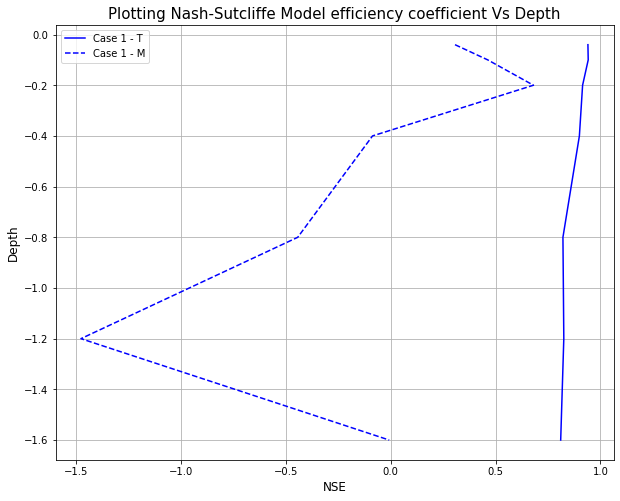

In [110]:
fig, ax = plt.subplots(figsize=(10, 8))

#plt.figure(figsize=(20, 12))

# Case 1
ax.plot(nse_df_case1.iloc[:,0], -nse_df_case1.index,'b', label=f'Case 1 - T')
ax.plot(nse_df_case1.iloc[:,1], -nse_df_case1.index,'b--',label=f'Case 1 - M')

# Case 2
#ax.plot(nse_df_case2.iloc[:,0], -nse_df_case1.index,'g', label=f'Case 2 - T')
#ax.plot(nse_df_case2.iloc[:,1], -nse_df_case1.index,'g--',label=f'Case 2 - M')

# Case 3
#ax.plot(nse_df_case3.iloc[:,0], -nse_df_case1.index,'y', label=f'Case 3 - T')
#ax.plot(nse_df_case3.iloc[:,1], -nse_df_case1.index,'y--',label=f'Case 3 - M')


#for i, name in enumerate(cf_names):
#    ax.plot(locals()[f'obj_fn_{i+1}']['total_phi'],label=f'{name}')
    
ax.set_title('Plotting Nash-Sutcliffe Model efficiency coefficient Vs Depth', fontsize=15)
ax.set_ylabel('Depth', fontsize=12)
ax.set_xlabel('NSE', fontsize=12)
ax.grid(b=True)
ax.legend()

Comments:

    * The temperature values have been predicted well with NSE values greater than 0.8. The NSE value decreases as the depth increases.
    * NSE values are positive at the first two depths but as the depth increases, the NSE value becomes more negative (less than 0) indicating that the mean is a better representative than the model. Since Temperature is the only Top B.C. and there is no hydraulic input, it could be that the moisture is not predicted well. (What if we add precipitation at the top?)
    * 